<a href="https://colab.research.google.com/github/harshnandwana/Machine-learning-projects/blob/main/Unsupervised_Behaviour_Prediction/Consumer_behaviour_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv",sep="\t")

File here was seperated using "\t"

In [2]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [3]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


##Data Preprocessing

In [4]:
def dateyear(date):
  dmy=date.split("-") 
  ret=[]
  #integer_map = map(int, dmy)
  #integer_list = list(integer_map)
  for i in range(2,-1,-1):
    ret.append(dmy[i])
  return " ".join(ret)
df['Dt_Customer']=df.Dt_Customer.apply(dateyear)

In [5]:
import datetime
import calendar
def findDay(date):
    born = datetime.datetime.strptime(date, '%Y %m %d').weekday()
    return (calendar.day_name[born])
df["day"]=df['Dt_Customer'].apply(findDay)

In [6]:
df.Dt_Customer.max()

'2014 06 29'

**lets assume the data was collected in 2015**

In [7]:
def age(born):
  return 2015-born
df['age']=df.Year_Birth.apply(age)

In [8]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,day,age
0,5524,1957,Graduation,Single,58138.0,0,0,2012 09 04,58,635,...,0,0,0,0,0,3,11,1,Tuesday,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014 03 08,38,11,...,0,0,0,0,0,3,11,0,Saturday,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013 08 21,26,426,...,0,0,0,0,0,3,11,0,Wednesday,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014 02 10,26,11,...,0,0,0,0,0,3,11,0,Monday,31
4,5324,1981,PhD,Married,58293.0,1,0,2014 01 19,94,173,...,0,0,0,0,0,3,11,0,Sunday,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013 06 13,46,709,...,0,0,0,0,0,3,11,0,Thursday,48
2236,4001,1946,PhD,Together,64014.0,2,1,2014 06 10,56,406,...,0,0,1,0,0,3,11,0,Tuesday,69
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014 01 25,91,908,...,1,0,0,0,0,3,11,0,Saturday,34
2238,8235,1956,Master,Together,69245.0,0,1,2014 01 24,8,428,...,0,0,0,0,0,3,11,0,Friday,59


here we can see above in marital_status it seems single together divorced etc so lets examine this closely

In [9]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
maritaldict={"Single":"Single","YOLO":"Single","Alone":"Single","Absurd":"Single","Widow":"Single","Divorced":"Single","Married":"Married","Together":"Married"}
df['Marital_Status']=df['Marital_Status'].replace(maritaldict)
df.Marital_Status.unique()

array(['Single', 'Married'], dtype=object)

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,46.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,19.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,38.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,122.000000


** here we can observe income of some candidates are missing**

In [12]:
df=df.dropna()

In [13]:
df.count()

ID                     2216
Year_Birth             2216
Education              2216
Marital_Status         2216
Income                 2216
Kidhome                2216
Teenhome               2216
Dt_Customer            2216
Recency                2216
MntWines               2216
MntFruits              2216
MntMeatProducts        2216
MntFishProducts        2216
MntSweetProducts       2216
MntGoldProds           2216
NumDealsPurchases      2216
NumWebPurchases        2216
NumCatalogPurchases    2216
NumStorePurchases      2216
NumWebVisitsMonth      2216
AcceptedCmp3           2216
AcceptedCmp4           2216
AcceptedCmp5           2216
AcceptedCmp1           2216
AcceptedCmp2           2216
Complain               2216
Z_CostContact          2216
Z_Revenue              2216
Response               2216
day                    2216
age                    2216
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


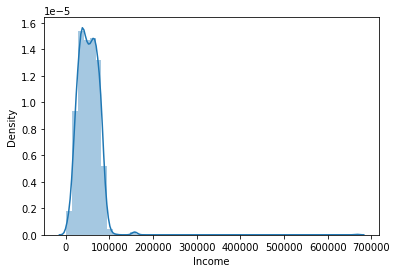

In [14]:
import seaborn as sns
sns.distplot(df.Income)
sns.set_theme(style="whitegrid")

**salary beyond $100000 is an outlier or exception**

In [15]:
df=df[df['Income']<100000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


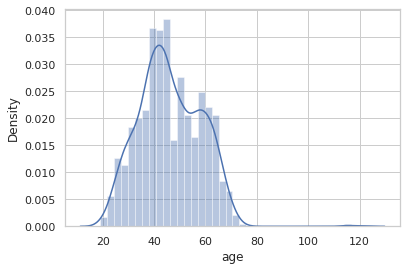

In [16]:
sns.distplot(df.age)

In [17]:
df=df[df['age']<80]

In [18]:
df.ID.count()

2200

In [19]:
df=df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth'],axis=1)

**I see no outliers moving ahead**

##Feature Engg

In [20]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'day', 'age'],
      dtype='object')

In [21]:
df["spendings"]=df.MntWines+df.MntFruits+df.MntMeatProducts+df.MntFishProducts+df.MntSweetProducts

In [22]:
df['purchases']=df.NumWebPurchases+df.NumCatalogPurchases+df.NumStorePurchases

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder= LabelEncoder()
df["Education"]= df[["Education"]].apply(encoder.fit_transform)
df["day"]= df[["day"]].apply(encoder.fit_transform)
df["Marital_Status"]=df["Marital_Status"].replace({"Single":0,"Married":1})

In [24]:
df['acceptance']=6*df.AcceptedCmp1+5*df.AcceptedCmp2+4*df.AcceptedCmp3+3*df.AcceptedCmp4+2*df.AcceptedCmp5+df.Response

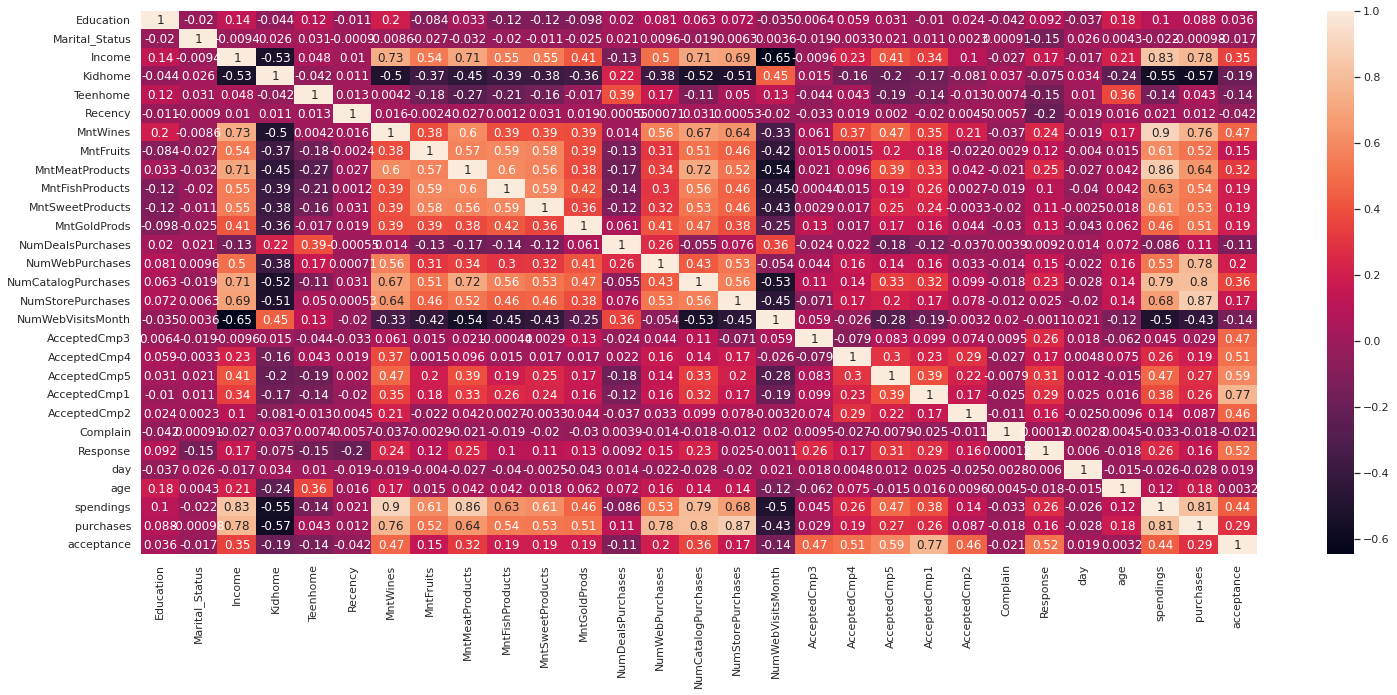

In [25]:
import matplotlib.pyplot as plt
#correlation matrix
plt.figure(figsize=(25,10))  
sns.heatmap(df.corr(),annot=True)

##Modelling

In [26]:
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")


All features are now scaled


In [27]:
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,day,age,spendings,purchases,acceptance
0,-0.349296,-1.349264,0.322649,-0.824976,-0.932743,0.309694,0.976910,1.558576,1.747283,2.453291,...,1.453944,2.640049,-0.561730,0.686955,-0.095783,1.008251,1.017315,1.679759,1.323585,-0.090415
1,-0.349296,-1.349264,-0.250642,1.036508,0.904351,-0.381727,-0.873971,-0.638639,-0.731316,-0.651699,...,-1.145701,-0.586478,-1.180872,-0.142519,-0.095783,-0.473810,1.273732,-0.939260,-1.193655,-0.451419
2,-0.349296,0.741145,0.977651,-0.824976,-0.932743,-0.796580,0.356983,0.573618,-0.175926,1.339147,...,1.453944,-0.227975,1.295695,-0.557255,-0.095783,1.502271,0.333536,0.299043,1.043892,-0.451419
3,-0.349296,0.741145,-1.208136,1.036508,-0.932743,-0.796580,-0.873971,-0.562873,-0.667056,-0.505582,...,-0.774323,-0.944982,-0.561730,0.272218,-0.095783,-0.967831,-1.290438,-0.892367,-0.913961,-0.451419
4,1.433652,0.741145,0.330184,1.036508,-0.932743,1.554251,-0.393454,0.422086,-0.217236,0.151945,...,0.339811,0.130528,0.057411,-0.142519,-0.095783,0.020210,-1.034021,-0.268874,0.204812,-0.451419


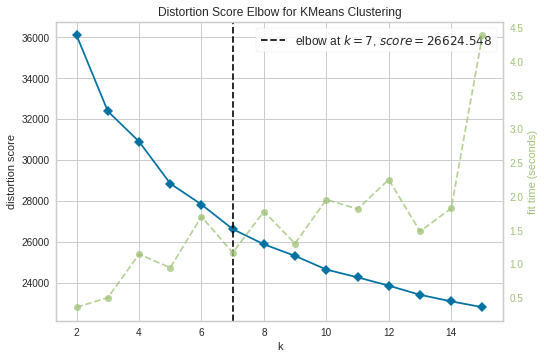

In [28]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), k=15)
Elbow_M.fit(ds)
Elbow_M.show()

In [29]:
clusters = KMeans(n_clusters=7, init='k-means++').fit(ds)
df["group"]= clusters.labels_
ds["group"]= clusters.labels_
y_kmeans = clusters.fit_predict(ds)
ds.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,day,age,spendings,purchases,acceptance,group
0,-0.349296,-1.349264,0.322649,-0.824976,-0.932743,0.309694,0.976910,1.558576,1.747283,2.453291,...,2.640049,-0.561730,0.686955,-0.095783,1.008251,1.017315,1.679759,1.323585,-0.090415,1
1,-0.349296,-1.349264,-0.250642,1.036508,0.904351,-0.381727,-0.873971,-0.638639,-0.731316,-0.651699,...,-0.586478,-1.180872,-0.142519,-0.095783,-0.473810,1.273732,-0.939260,-1.193655,-0.451419,2
2,-0.349296,0.741145,0.977651,-0.824976,-0.932743,-0.796580,0.356983,0.573618,-0.175926,1.339147,...,-0.227975,1.295695,-0.557255,-0.095783,1.502271,0.333536,0.299043,1.043892,-0.451419,4
3,-0.349296,0.741145,-1.208136,1.036508,-0.932743,-0.796580,-0.873971,-0.562873,-0.667056,-0.505582,...,-0.944982,-0.561730,0.272218,-0.095783,-0.967831,-1.290438,-0.892367,-0.913961,-0.451419,5
4,1.433652,0.741145,0.330184,1.036508,-0.932743,1.554251,-0.393454,0.422086,-0.217236,0.151945,...,0.130528,0.057411,-0.142519,-0.095783,0.020210,-1.034021,-0.268874,0.204812,-0.451419,0


In [64]:
len(ds.columns)

25

In [84]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics
db = DBSCAN(eps=3, min_samples=25).fit(ds)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
ds['labels']=labels
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 917


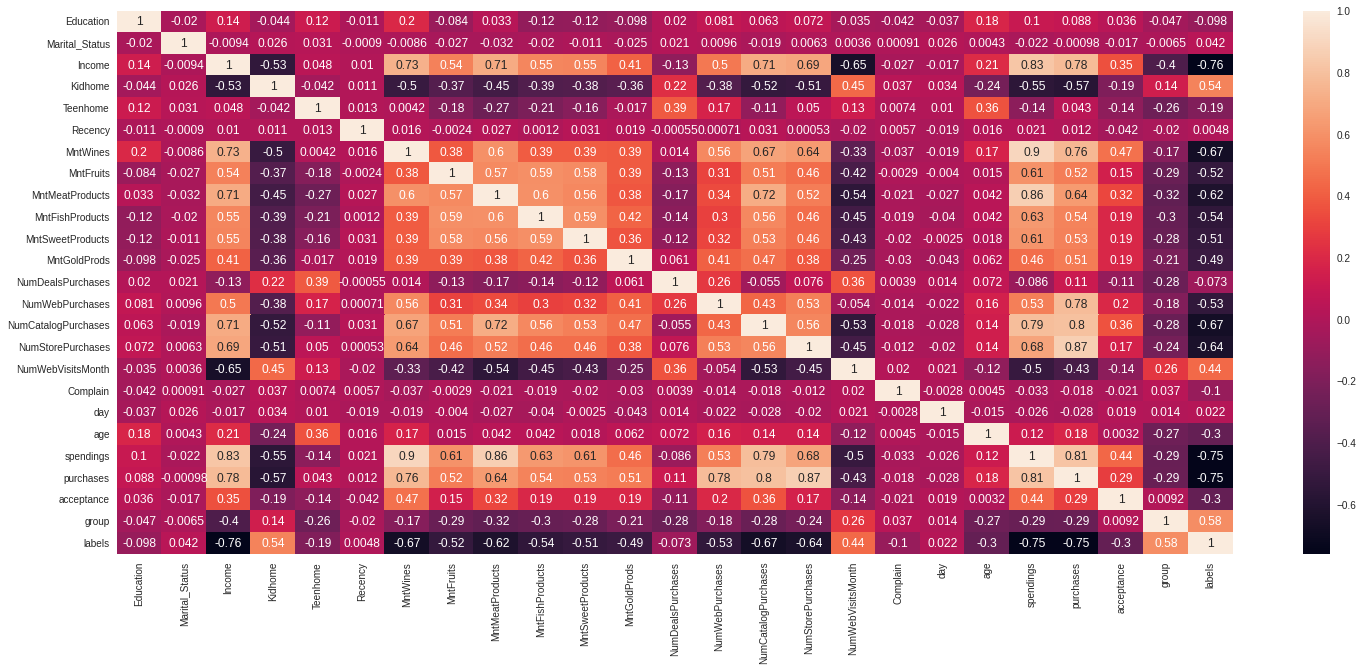

In [85]:
plt.figure(figsize=(25,10))  
sns.heatmap(ds.corr(),annot=True)

**NumbWebvisitsMonth** seems to be an important feaeture when classifying consumers in group

---


**day** here can be seen as on which day people usually shop even this data is not complete as we were just provided with last shopping day 

---


**KidHome** also shows significance importance  